In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
t = np.arange(1024)
x = np.sin(t*0.01)

In [6]:
class delta_sigma():
    out = 0
    acc = 0
    
    def calc(self, x):
        y = x - self.out
        self.acc += y
        self.out = 1 if self.acc >= 0 else -1
        return self.out

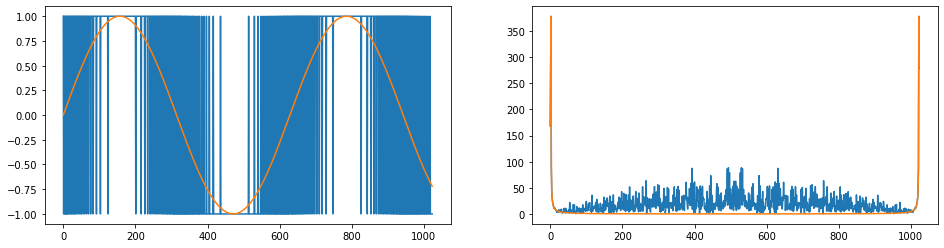

In [10]:
X = np.fft.fft(x)   

ds = delta_sigma()
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = ds.calc(x[i])
Y = np.fft.fft(y)   
    
# 表示
fig = plt.figure(figsize=(16, 4))
ax_x = fig.add_subplot(121)
ax_x.plot(y)
ax_x.plot(x)
ax_X = fig.add_subplot(122)
ax_X.plot(np.abs(Y))
ax_X.plot(np.abs(X))
plt.show()

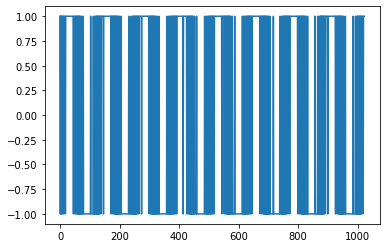

In [44]:
plt.plot(y)

In [50]:
# 移動平均
def lpf(x):
    y = np.zeros_like(x)
    for i in range(len(x)-1):
        y[i] = (x[i] + x[i+1])/2
    return y

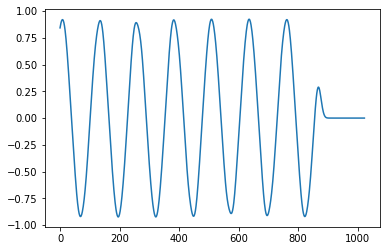

In [51]:
yy = y.copy()
for i in range(300):
    yy = lpf(yy)
plt.plot(yy)

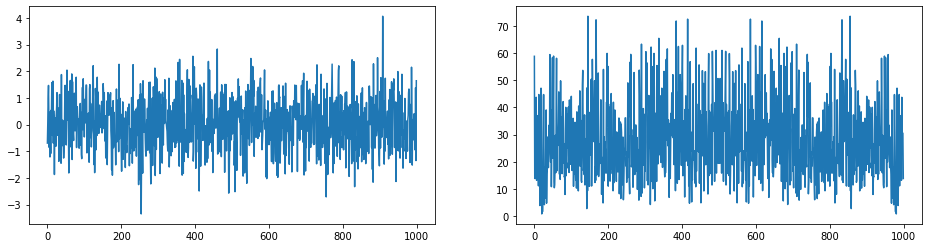

In [52]:
# ホワイトノイズを作成
x =  np.random.normal(0, 1.0, 1000)
X = np.fft.fft(x)

# 表示
fig = plt.figure(figsize=(16, 4))
ax_x = fig.add_subplot(121)
ax_x.plot(x)
ax_X = fig.add_subplot(122)
ax_X.plot(np.abs(X))
plt.show()

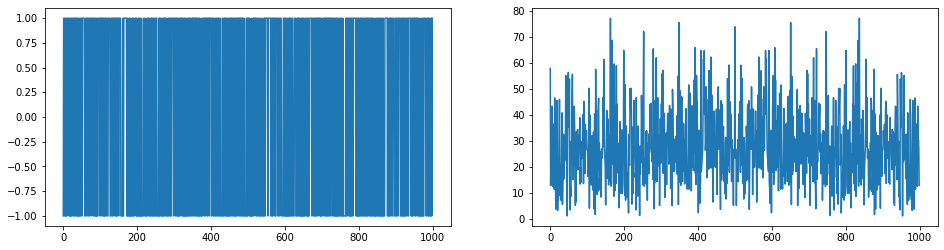

In [56]:
# delta sigma
ds = delta_sigma()
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = ds.calc(x[i])
Y = np.fft.fft(y)

# 表示
fig = plt.figure(figsize=(16, 4))
ax_x = fig.add_subplot(121)
ax_x.plot(y)
ax_X = fig.add_subplot(122)
ax_X.plot(np.abs(Y))
plt.show()

# 二次の⊿Σで同じことをやってみる

In [24]:
class delta_sigma2():
    out0 = 0
    out1 = 0
    acc0 = 0
    acc1 = 0
    
    def calc(self, x):
        y = x - self.out1 * 2
        self.acc0 += y
        y = self.acc0 - self.out0 * 4
        self.acc1 += y
        self.out1 = self.out0
        self.out0 = 1 if self.acc1 >= 0 else -1
        return self.out0

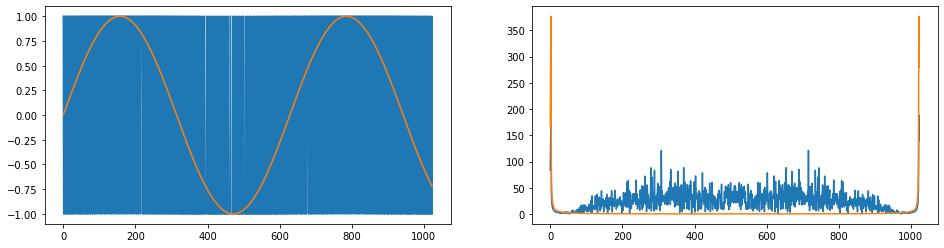

In [25]:
X = np.fft.fft(x)   

ds = delta_sigma2()
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = ds.calc(x[i])
Y = np.fft.fft(y)   
    
# 表示
fig = plt.figure(figsize=(16, 4))
ax_x = fig.add_subplot(121)
ax_x.plot(y)
ax_x.plot(x)
ax_X = fig.add_subplot(122)
ax_X.plot(np.abs(Y))
ax_X.plot(np.abs(X))
plt.show()